# S-H-ESD Algorithm

In [1]:
from pyculiarity import detect_ts
import pandas as pd
import matplotlib.pyplot as plt

# Result for March 2018

In [3]:
data1 = pd.read_csv('datasets/rule_based/ammonia_2018_03.csv', usecols=['timestamp', 'value'])
data1['timestamp'] = pd.to_datetime(data1['timestamp'])
data1.set_index('timestamp', drop=True)
results = detect_ts(data1, max_anoms=0.3, direction='both')

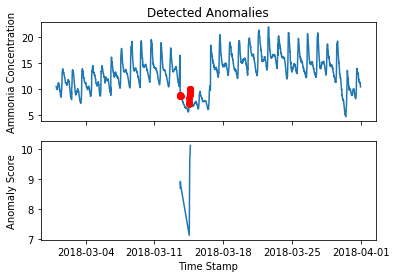

In [4]:
f, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(data1['timestamp'], data1['value'])
ax[0].plot(results['anoms'].index, results['anoms']['anoms'], 'ro')
ax[0].set_title('Detected Anomalies')
ax[1].set_xlabel('Time Stamp')
ax[0].set_ylabel('Ammonia Concentration')
ax[1].plot(results['anoms'].index, results['anoms']['anoms'])
ax[1].set_ylabel('Anomaly Score')


# Result for May 2018

In [5]:
data2 = pd.read_csv('datasets/rule_based/ammonia_2018_05.csv', usecols=['timestamp', 'value'])
data2['timestamp'] = pd.to_datetime(data2['timestamp'])
data2.set_index('timestamp', drop=True)
results = detect_ts(data2, max_anoms=0.3, direction='both')

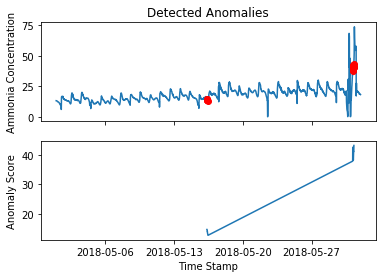

In [6]:
f, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(data2['timestamp'], data2['value'])
ax[0].plot(results['anoms'].index, results['anoms']['anoms'], 'ro')
ax[0].set_title('Detected Anomalies')
ax[1].set_xlabel('Time Stamp')
ax[0].set_ylabel('Ammonia Concentration')
ax[1].plot(results['anoms'].index, results['anoms']['anoms'])
ax[1].set_ylabel('Anomaly Score')


# Derivative Algorithm & Exponential Moving Average Algorithm

In [8]:
# Python for Luminol
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import time
from datetime import date

import luminol
from luminol.anomaly_detector import AnomalyDetector

# Result for March 2018

In [33]:
df = pd.read_csv("datasets/rule_based/ammonia_2018_03.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df.timestamp.values.astype(np.int64) // 10 ** 9
ts = pd.Series(df.value.values, index=df.timestamp).to_dict()

## Derivative Method

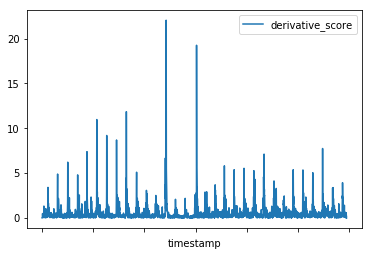

In [34]:
score_derivative = AnomalyDetector(ts, algorithm_name='derivative_detector').get_all_scores()
result_derivative = []
for (timestamp, value) in score_derivative.items():
    t_str = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(timestamp))
    result_derivative.append([t_str, value])
df_derivative = pd.DataFrame(result_derivative, columns = ["timestamp", "derivative_score"])
df_derivative.plot(x = "timestamp", y = "derivative_score")

## Moving Average Method

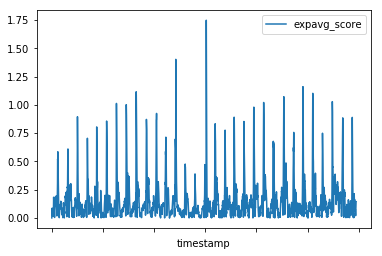

In [17]:
score_expavg = AnomalyDetector(ts, algorithm_name='exp_avg_detector').get_all_scores()
result_expavg = []
for (timestamp, value) in score_expavg.items():
    t_str = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(timestamp))
    result_expavg.append([t_str, value])
df_expavg = pd.DataFrame(result_expavg, columns = ["timestamp", "expavg_score"])
df_expavg.plot(x = "timestamp", y = "expavg_score")

## Combined Method

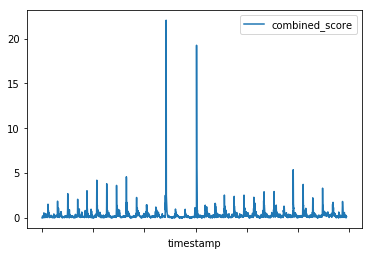

In [18]:
score_combined = AnomalyDetector(ts, algorithm_name='default_detector').get_all_scores()
result_combined = []
for (timestamp, value) in score_combined.items():
    t_str = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(timestamp))
    result_combined.append([t_str, value])
df_combined = pd.DataFrame(result_combined, columns = ["timestamp", "combined_score"])
df_combined.plot(x = "timestamp", y = "combined_score")